In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv(r"Spam Data/emails.csv")

In [19]:
df.head()

,reply,home,one,new,get,use,precedence,bulk,post,style,...,doesnt,certificate,cee,resume,grade,prosperity,gimp,formula,coe,formed
0,5627.0,5498.0,5484.0,5179.0,5084.0,5051.0,5025.0,4890.0,4510.0,4338.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df = df[df.index != 0]

In [21]:
df.head()

,reply,home,one,new,get,use,precedence,bulk,post,style,...,doesnt,certificate,cee,resume,grade,prosperity,gimp,formula,coe,formed
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#Making the pandas dataframe into a numpy array
y = df['ContainsSpam'].values
df = df.drop(['ContainsSpam'],axis=1)
X = df.values

In [24]:
X.shape

(7453, 2999)

In [25]:
y.shape

(7453,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import SGDClassifier

In [28]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

c:\users\ianhu\anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [29]:
from sklearn.model_selection import cross_val_predict

In [30]:
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train,cv=3)

c:\users\ianhu\anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\ianhu\anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)
#5500 not spams were classified as not spam.  48 spams were classified as not spams
#79 were not spam but classified as spam. 335 spams were correctly identified

array([[5534,   31],
       [  74,  323]], dtype=int64)

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
precision_score(y_train,y_train_pred)

0.9124293785310734

In [34]:
recall_score(y_train,y_train_pred)

0.8136020151133502

In [35]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)
#84% f1 score overall, cool!  Now, will try tuning hyperparameters

0.8601864181091877

In [36]:
from sklearn.metrics import precision_recall_curve

In [38]:
precision,recall,threshold = precision_recall_curve(y_train,y_train_pred)

In [39]:
import matplotlib.pyplot as plt

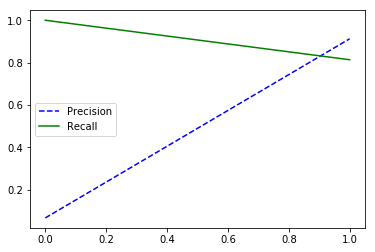

In [44]:
plt.plot(threshold,precision[:-1],"b--",label="Precision")
plt.plot(threshold,recall[:-1],"g-",label="Recall")
plt.xlabel=("Threshold")
plt.legend(loc="center left")
plt.ylim=([0,1])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
x_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [60]:
from sklearn.model_selection import cross_val_score
y_train_pred = cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)

c:\users\ianhu\anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\ianhu\anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [61]:
#5k classified as not spam, 3 spams classified as not spam
#141 were not spam, 256 were classified correctly as spam
#97.5% accuracy in identifying spam messages
confusion_matrix(y_train,y_train_pred)

array([[5562,    3],
       [ 141,  256]], dtype=int64)